In [1]:
import json
import cPickle as pickle
import numpy as np
from IPython.display import Image
from fatiando.mesher import PolygonalPrism
from fatiando.gravmag import polyprism
from fatiando  import gridder, utils
from fatiando.vis import myv, mpl
import fatiando

In [2]:
area = [5000, 25000, 5000, 25000]
bounds = [0, 30000, 0, 30000, 0, 5000]

# Vertical Dike

In [3]:
mpl.figure()
mpl.axis('scaled')
mpl.square(area)
dike_verts = mpl.draw_polygon(bounds[:4], mpl.gca(), xy2ne=True)

In [4]:
dike_verts

array([[ 20487.80487805,   7366.61585366],
       [  9893.29268293,   7366.61585366],
       [  9817.07317073,  10034.29878049],
       [ 20411.58536585,  10034.29878049]])

In [5]:
dike = PolygonalPrism(dike_verts, 0, 5000, {'magnetization': 10})

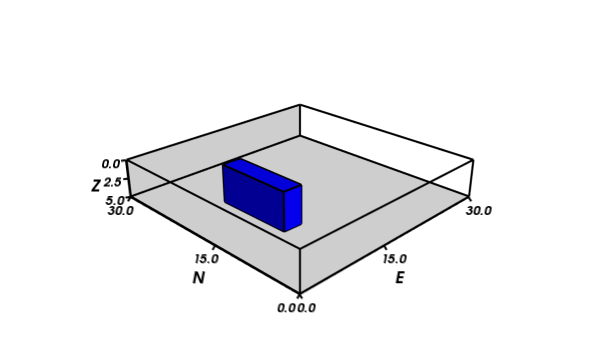

In [6]:
myv.figure(size=(600, 400))
myv.polyprisms([dike], linewidth=2)
myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.1f')
myv.wall_north(bounds)
myv.wall_bottom(bounds)
myv.savefig('model_dike.png')
myv.show()
Image(filename='model_dike.png')

# Sill

In [7]:
mpl.figure()
mpl.axis('scaled')
mpl.square(area)
mpl.polygon(dike, xy2ne=True)
sill_verts = mpl.draw_polygon(bounds[:4], mpl.gca(), xy2ne=True)

In [8]:
sill_verts

array([[ 18887.19512195,  13235.51829268],
       [ 20335.36585366,  14836.12804878],
       [ 20030.48780488,  17046.49390244],
       [ 18048.7804878 ,  18037.34756098],
       [ 16600.6097561 ,  16665.39634146],
       [ 17057.92682927,  14531.25      ]])

In [9]:
sill = PolygonalPrism(sill_verts, 1000, 1500, {'magnetization': 10})

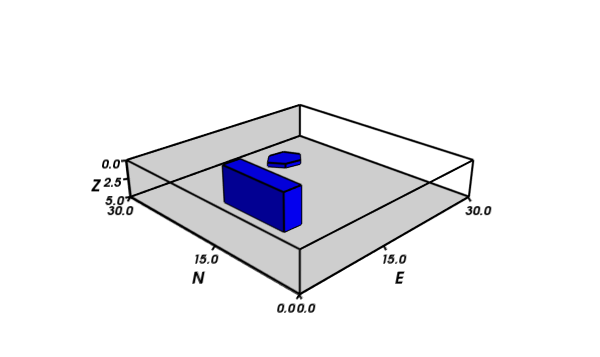

In [10]:
myv.figure(size=(600, 400))
myv.polyprisms([dike, sill], linewidth=2)
myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.1f')
myv.wall_north(bounds)
myv.wall_bottom(bounds)
myv.savefig('model_sill.png')
myv.show()
Image(filename='model_sill.png')

# Batholith

In [11]:
mpl.figure()
mpl.axis('scaled')
mpl.square(area)
mpl.polygon(dike, xy2ne=True)
mpl.polygon(sill, xy2ne=True)
batholith_verts = mpl.draw_polygon(bounds[:4], mpl.gca(), xy2ne=True)

In [12]:
batholith_verts

array([[ 15304.87804878,  11482.4695122 ],
       [ 14085.36585366,  11482.4695122 ],
       [ 13018.29268293,  11558.68902439],
       [ 11951.2195122 ,  12016.00609756],
       [ 11875.        ,  12549.54268293],
       [ 12256.09756098,  13921.49390244],
       [ 12789.63414634,  15141.00609756],
       [ 13551.82926829,  16360.51829268],
       [ 14390.24390244,  17656.25      ],
       [ 15152.43902439,  17275.15243902],
       [ 15076.2195122 ,  15750.76219512],
       [ 15228.65853659,  14683.68902439],
       [ 15609.75609756,  13235.51829268]])

In [13]:
batholith = PolygonalPrism(batholith_verts, 500, 4000, {'magnetization': 8})

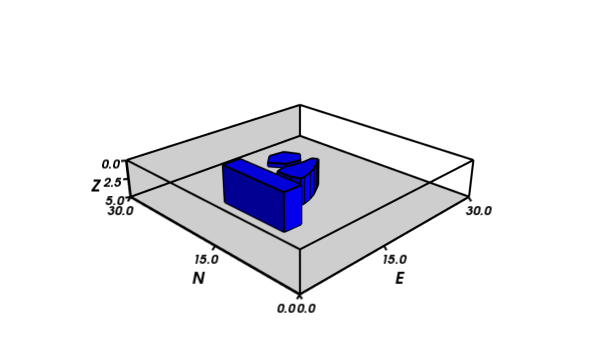

In [14]:
myv.figure(size=(600, 400))
myv.polyprisms([dike, sill, batholith], linewidth=2)
myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.1f')
myv.wall_north(bounds)
myv.wall_bottom(bounds)
myv.savefig('model_batholith.png')
myv.show()
Image(filename='model_batholith.png')

In [15]:
model = [dike, sill, batholith]

# Forward Modeling

In [17]:
shape = (100, 100)
x, y, z = gridder.regular(area, shape, z=-300)
inc, dec = -15, 30

In [18]:
tf = utils.contaminate(polyprism.tf(x, y, z, model, inc, dec), 5)

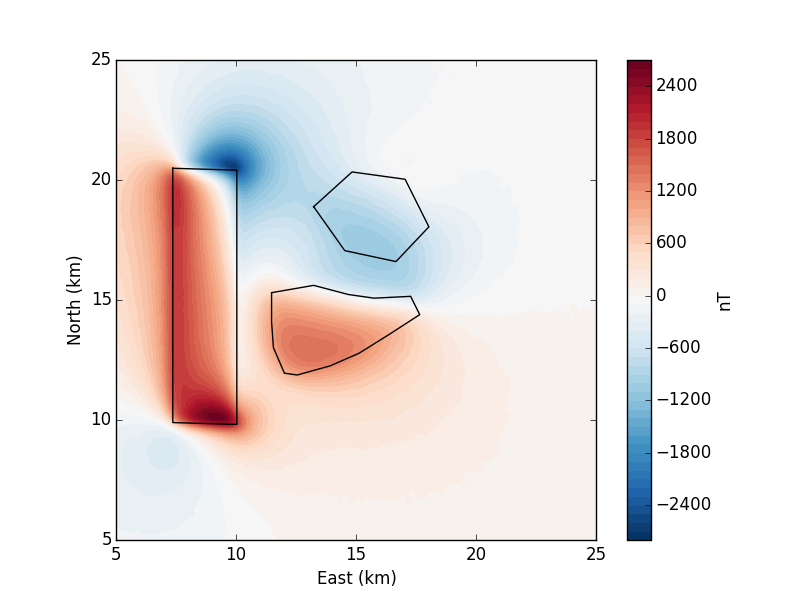

In [19]:
mpl.figure()
mpl.axis('scaled')
for b in model:
    mpl.polygon(b, xy2ne=True)
mpl.contourf(y, x, tf, shape, 60, cmap=mpl.cm.RdBu_r)
cb = mpl.colorbar().set_label('nT')
mpl.m2km()
mpl.xlabel('East (km)')
mpl.ylabel('North (km)')
mpl.savefig('synthetic_data.png')
mpl.show()
Image(filename='synthetic_data.png')

# Output

In [20]:
np.savetxt('synthetic_data.txt', np.transpose([x, y, z, tf]))

In [21]:
with open('metadata.json', 'w') as f:
    json.dump(dict(area=area, bounds=bounds, inc=inc, dec=dec, shape=shape), f)

In [22]:
with open('model.pickle', 'w') as f:
    pickle.dump(model, f)

In [23]:
with open('dike.json', 'w') as f:
    json.dump(dike_verts.tolist(), f)
with open('sill.json', 'w') as f:
    json.dump(sill_verts.tolist(), f)
with open('batholith.json', 'w') as f:
    json.dump(batholith_verts.tolist(), f)